In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=bcff011cf37f5d57089be393f2c060d0f70dc825f3e32d1731967f59da34e4c7
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=326b18f4797fb14fb4c9e519ccf488c1c473d669e1313a53a248429714dd0555
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import umap

In [ ]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(6,5)})

In [ ]:
tsne = TSNE(n_components=2, random_state=0, learning_rate = 200, perplexity= 30, early_exaggeration = 30, n_iter= 3000)
#tsne = TSNE(n_components=2)
pca = PCA(n_components=2)
lda = LDA(n_components=2)
umap = umap.UMAP()

# Wisconsin Breast Cancer dataset

In [ ]:
df_breast = pd.read_csv("breastCancer.csv")
#df_breast           = df_breast.drop(['id'], axis = 1)


In [ ]:
#df_breast           = df_breast.drop(df_breast[df_breast.bare_nucleoli == '?'].index)

In [ ]:
df_breast['new_bare'] = df_breast['bare_nucleoli'].astype(str).astype(int)
df_breast = df_breast.drop(['bare_nucleoli'], axis = 1)

In [ ]:
df_breast_highd     = df_breast.drop(['class'], axis = 1)
df_breast_highd = pd.DataFrame(preprocessing.normalize(df_breast_highd, axis = 0))

In [ ]:
data_breast_lowd = umap.fit_transform(df_breast_highd)
print(data_breast_lowd)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


[[ 1.66291    8.898866 ]
 [ 3.0180855  9.081525 ]
 [ 1.1475235  6.115269 ]
 ...
 [ 8.072644  29.408155 ]
 [ 4.9619927 16.91515  ]
 [10.140664  27.06066  ]]


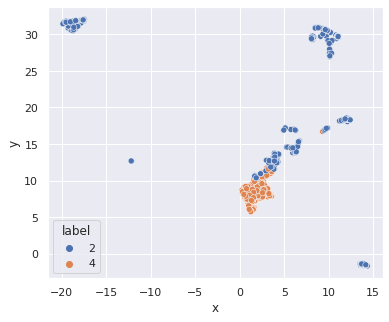

In [ ]:

data_breast_visualization = pd.concat([df_breast['class'],pd.DataFrame(data_breast_lowd)], axis = 1)

data_breast_visualization.columns = ['label','x','y']
sns.scatterplot(x="x",y="y", hue="label", data = data_breast_visualization,  palette= sns.color_palette(n_colors=2))

# Heart Disease Classification

In [ ]:
df_heart = pd.read_csv("heart.csv")

In [ ]:
data_heart_highd = df_heart.drop(['target'], axis = 1)

In [ ]:
data_heart_highd = df_heart.drop(['sex'], axis = 1)
data_heart_highd = df_heart.drop(['age'], axis = 1)
data_heart_highd = pd.DataFrame(preprocessing.normalize(data_heart_highd, axis = 0))

In [ ]:
print(data_heart_highd.shape)

(303, 13)


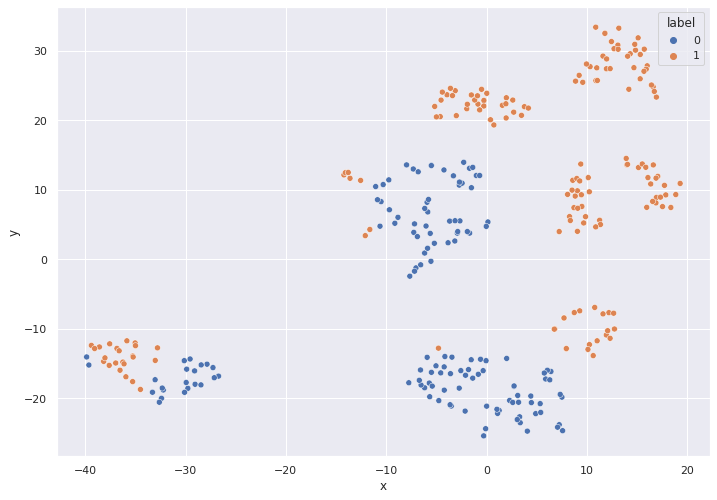

In [ ]:
data_heart_lowd = tsne.fit_transform(data_heart_highd)
data_heart_visualization = pd.concat([df_heart['target'],pd.DataFrame(data_heart_lowd)], axis = 1)
data_heart_visualization.columns = ['label','x','y']
sns.scatterplot(x="x",y="y", hue="label", data = data_heart_visualization)

# Chinese Mnist

In [ ]:
chinese = pd.read_csv('chineseMNIST.csv')
data_chinese_highd = chinese.drop(['label'], axis = 1)
data_chinese_highd = pd.DataFrame(preprocessing.normalize(data_chinese_highd, axis = 0))

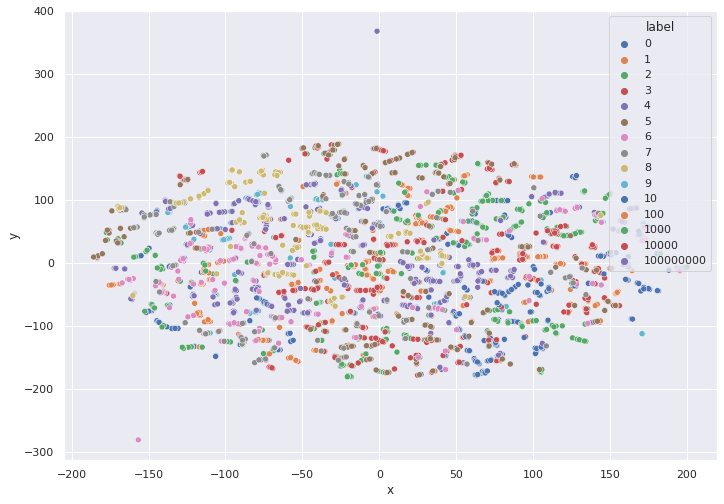

In [ ]:
data_cmnist_pca = pca.fit_transform(data_chinese_highd)
data_cmnist_tsne = tsne.fit_transform(data_cmnist_pca)
data_cminist_visualization = pd.concat([chinese['label'],pd.DataFrame(data_cmnist_tsne)], axis = 1)
data_cminist_visualization.columns = ['label','x','y']
sns.scatterplot(x="x",y="y", hue="label", data = data_cminist_visualization, palette= sns.color_palette(n_colors=15))

# Hminist

In [ ]:
hminist = pd.read_csv('hmnist_8_8_RGB.csv')
data_hminist_highd = hminist.drop(['label'], axis = 1)

In [ ]:
print(data_hminist_highd)

       pixel0000  pixel0001  pixel0002  ...  pixel0189  pixel0190  pixel0191
0            199        156        188  ...        184        143        167
1            115         87        115  ...         74         51         60
2            203        146        164  ...        177        138        158
3            135         96        110  ...         58         39         46
4            204        156        187  ...        207        175        188
...          ...        ...        ...  ...        ...        ...        ...
10010        205        186        202  ...        207        185        186
10011        103         89         88  ...         99         84         80
10012        178        160        165  ...        197        177        172
10013        166        124        142  ...        186        159        169
10014        178        145        124  ...        163        105         91

[10015 rows x 192 columns]


In [ ]:
data_hminist_lowd = tsne.fit_transform(data_hminist_highd)

In [ ]:
data_hminist_visualization = pd.concat([hminist['label'],pd.DataFrame(data_hminist_lowd)], axis = 1)
data_hminist_visualization.columns = ['label','x','y']


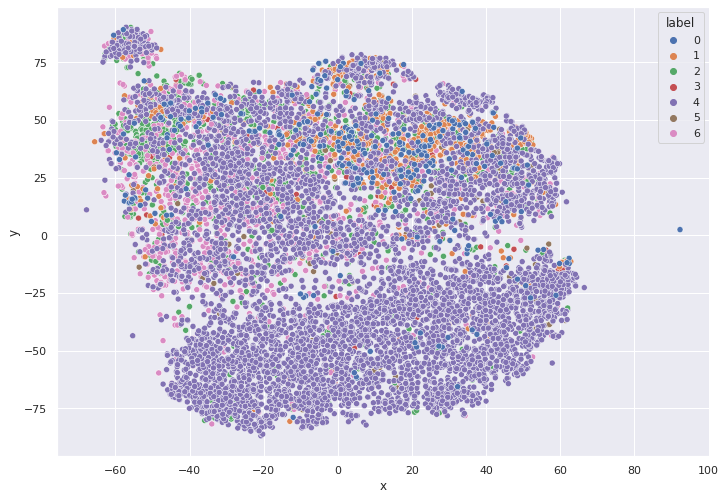

In [ ]:
sns.scatterplot(x="x",y="y", hue="label", data = data_hminist_visualization, palette = sns.color_palette(n_colors = 7))

# Cardiovascular Disease

In [ ]:
txt_file = pd.read_csv('cardiovascular.txt')
txt_file.to_csv(sep = ';',index = None)

'"ind;sbp;tobacco;ldl;adiposity;famhist;typea;obesity;alcohol;age;chd"\n"1;160;12.00;5.73;23.11;Present;49;25.30;97.20;52;1"\n"2;144;0.01;4.41;28.61;Absent;55;28.87;2.06;63;1"\n"3;118;0.08;3.48;32.28;Present;52;29.14;3.81;46;0"\n"4;170;7.50;6.41;38.03;Present;51;31.99;24.26;58;1"\n"5;134;13.60;3.50;27.78;Present;60;25.99;57.34;49;1"\n"6;132;6.20;6.47;36.21;Present;62;30.77;14.14;45;0"\n"7;142;4.05;3.38;16.20;Absent;59;20.81;2.62;38;0"\n"8;114;4.08;4.59;14.60;Present;62;23.11;6.72;58;1"\n"9;114;0.00;3.83;19.40;Present;49;24.86;2.49;29;0"\n"10;132;0.00;5.80;30.96;Present;69;30.11;0.00;53;1"\n"11;206;6.00;2.95;32.27;Absent;72;26.81;56.06;60;1"\n"12;134;14.10;4.44;22.39;Present;65;23.09;0.00;40;1"\n"13;118;0.00;1.88;10.05;Absent;59;21.57;0.00;17;0"\n"14;132;0.00;1.87;17.21;Absent;49;23.63;0.97;15;0"\n"15;112;9.65;2.29;17.20;Present;54;23.53;0.68;53;0"\n"16;117;1.53;2.44;28.95;Present;35;25.89;30.03;46;0"\n"17;120;7.50;15.33;22.00;Absent;60;25.31;34.49;49;0"\n"18;146;10.50;8.29;35.36;Presen

In [ ]:
import csv
import zlib

with open('cardiovascular.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(";"," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('cardiovascular.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('ind','sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age','chd'))
        for group in grouped:
            writer.writerows(group)

In [ ]:
data_cardio = pd.read_csv('cardiovascular.csv')
for i in range(462):
  data_cardio.at[i,'famhist'] = 1 if data_cardio.at[i,'famhist'] == 'Present' else 0
data_cardio['hist'] = pd.to_numeric(data_cardio['famhist'])
data_cardio = data_cardio.drop(['famhist'], axis= 1)
data_cardio_highd = data_cardio.drop(['chd','ind','hist'], axis = 1)

ValueError: ignored

In [ ]:
print(data_cardio_highd)

In [ ]:
data_cardio_lowd = tsne.fit_transform(data_cardio_highd)
data_cardio_visualization = pd.concat([data_cardio['chd'],pd.DataFrame(data_cardio_lowd)], axis = 1)
data_cardio_visualization.columns = ['response','x','y']
sns.scatterplot(x="x",y="y", hue="response", data = data_cardio_visualization)

In [ ]:
data_cardio_lowd_pca = pca.fit_transform(data_cardio_highd)
data_cardio_visualization_pca = pd.concat([data_cardio['chd'],pd.DataFrame(data_cardio_lowd_pca)], axis = 1)
data_cardio_visualization_pca.columns = ['response','x','y']
sns.scatterplot(x="x",y="y", hue="response", data = data_cardio_visualization_pca)

# Skyserver Dataset

In [ ]:
data_sky = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

FileNotFoundError: ignored

In [ ]:
#data_sky_highd = data_sky.drop(['class'], axis = 1)
data_sky_highd = data_sky_highd.drop(data_sky_highd.index[1000:10000])

In [ ]:
#data_sky_lowd = tsne.fit_transform(data_sky_highd)
data_sky_visualization = pd.concat([data_sky['class'][:1000],pd.DataFrame(data_sky_lowd)], axis = 1)
data_sky_visualization = pd.concat([data_sky['class'],pd.DataFrame(data_sky_lowd)], axis = 1)
data_sky_visualization.columns = ['class','x','y']
sns.scatterplot(x="x",y="y", hue="class", data = data_sky_visualization)

In [ ]:
data_sky_pca = pca.fit_transform(data_sky_highd)
data_sky_visualization_pca = pd.concat([data_sky['class'][:1000],pd.DataFrame(data_sky_lowd)], axis = 1)
data_sky_visualization_pca.columns = ['class','x','y']
sns.scatterplot(x="x",y="y", hue="class", data = data_sky_visualization_pca)


# Iris dataset

In [ ]:
df_iris = pd.read_csv("Iris.csv")

In [ ]:
non_numeric = ['Species','Id']
data_in_high_d = df_iris.drop(non_numeric, axis = 1)

In [ ]:
data_2d = tsne.fit_transform(data_in_high_d)

In [ ]:
data = pd.concat([df_iris.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis = 1),pd.DataFrame(data_2d)], axis = 1)
data["Id"] = data.index
data.columns = ['Id','Species','x','y']
print(data.head())

   Id      Species          x          y
0   0  Iris-setosa -11.633183   9.986331
1   1  Iris-setosa -11.738493  11.026528
2   2  Iris-setosa -11.046741  10.890519
3   3  Iris-setosa -11.055773  11.088029
4   4  Iris-setosa -11.226251   9.893209


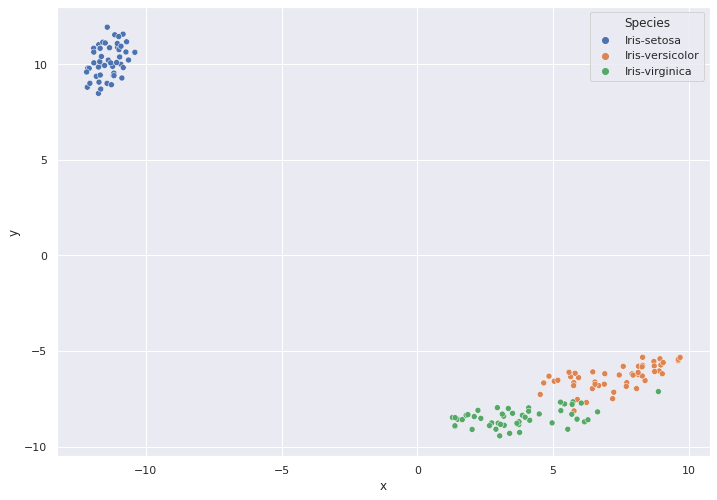

In [ ]:
sns.scatterplot(x="x",y="y", hue="Species", data = data)

# Fashion Minist Dataset

In [ ]:
df_fminist = pd.read_csv("fashion-mnist_train.csv")

In [ ]:
df_fminist = df_fminist.drop(df_fminist.index[1000:60000])
df_fminist.shape

(1000, 785)

In [ ]:
data_fminist_highd = df_fminist.drop(['label'], axis = 1)

In [ ]:
#data_fminist_highd = pca.fit_transform(data_fminist_highd)

In [ ]:
data_fminist_lowd = tsne.fit_transform(data_fminist_highd)

In [ ]:
data_fminist_visualization = pd.concat([df_fminist['label'],pd.DataFrame(data_fminist_lowd)], axis = 1)
#data_fminist_visualization['label'] = data_fminist_visualization.index
data_fminist_visualization.columns = ['label','x','y']

In [ ]:
sns.scatterplot(x="x",y="y", hue="label", data = data_fminist_visualization, palette =sns.color_palette("mako", as_cmap=True))

NameError: ignored

# The 20 newsgroups text dataset
Need data cleaning

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)[:1000,:]

In [ ]:
print(vectors.shape)

(1000, 101631)


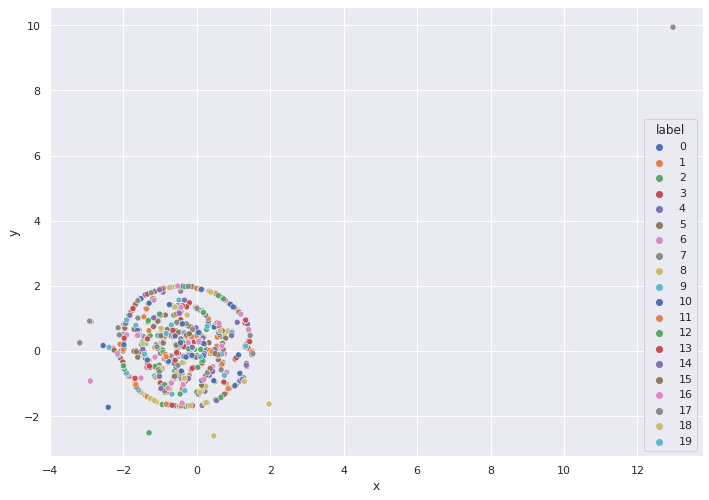

In [ ]:
data_20news_tsne = tsne.fit_transform(vectors)
data_20news_visualization = pd.concat([pd.DataFrame(newsgroups_train.target[:1000]),pd.DataFrame(data_20news_tsne)], axis = 1)
data_20news_visualization.columns = ['label','x','y']
sns.scatterplot(x="x",y="y", hue="label", data = data_20news_visualization, palette= sns.color_palette(n_colors=20))

In [ ]:
print(data_20news_visualization)

     label         x         y
0        7 -1.482808  0.262412
1        4 -0.498996 -0.650647
2        4 -1.657058  0.014615
3        1 -0.974367  1.104087
4       14  1.330173  0.952033
..     ...       ...       ...
995      6 -1.167615  1.563326
996     17 -0.234012  1.985886
997      4 -0.126302  0.115037
998     13 -1.980819  0.394308
999     15 -1.648178 -0.021891

[1000 rows x 3 columns]


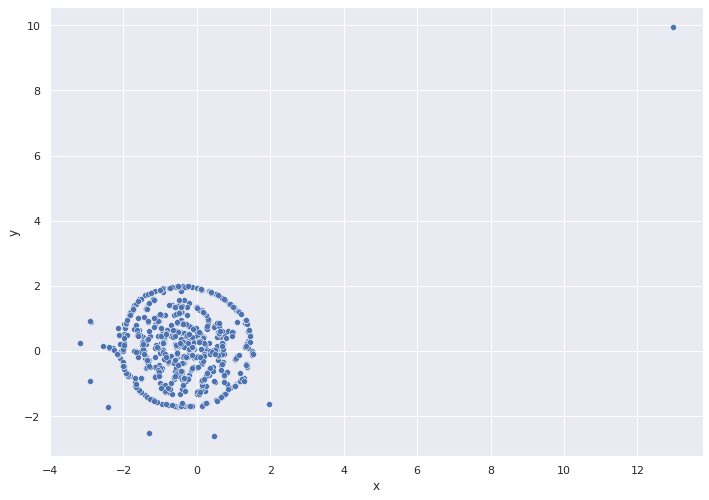

In [ ]:
sns.scatterplot(x="x",y="y", data = data_20news_visualization)

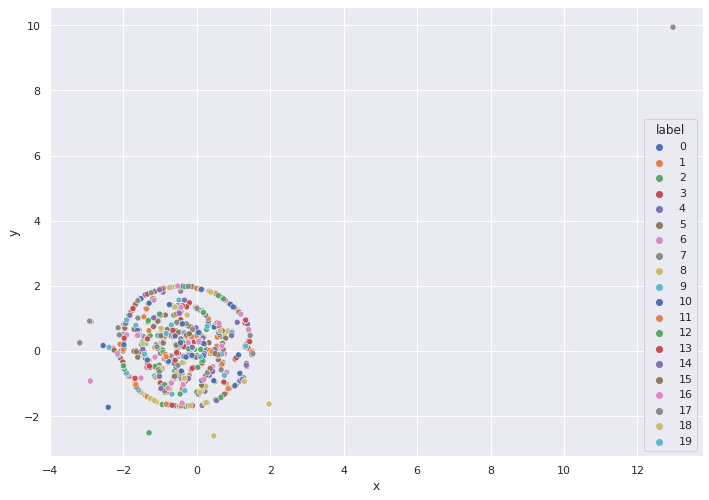

In [ ]:
sns.scatterplot(x="x",y="y", hue="label", data = data_20news_visualization, palette= sns.color_palette(n_colors=20))